In [3]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [4]:
#Data Preprocessing -- Turning data into required useful data

df = pd.read_csv("PFE.csv")
df= df[df.Volume!=0]
df = df.reset_index(drop=True)
df = df.drop(np.where(np.isnan(df['Volume'].to_numpy().astype('float32')))[0])
df = df.reset_index(drop=True)

rows = df.shape[0]
columns = df.shape[1]

df["Open-Close"] = df["Open"] - df["Close"]   # Open - Close
df["High-Low"] = df["High"] - df["Low"]       # High - Low

# 7 day Moving Average
df["7DMA"]=0.000000
for i in range(6,rows):
    df["7DMA"][i] = (df["Close"][i]+df["Close"][i-1]+df["Close"][i-2]+df["Close"][i-3]+df["Close"][i-4]+df["Close"][i-5]+df["Close"][i-6])/7

#21 Day Moving Average
df["21DMA"]=0.000000
for i in range(20,rows):
    df["21DMA"][i] = (df["Close"][i]+df["Close"][i-1]+df["Close"][i-2]+df["Close"][i-3]+df["Close"][i-4]+df["Close"][i-5]+df["Close"][i-6]+df["Close"][i-7]+df["Close"][i-8]+df["Close"][i-9]+df["Close"][i-10]+df["Close"][i-11]+df["Close"][i-12]+df["Close"][i-13]+df["Close"][i-14]+df["Close"][i-15]+df["Close"][i-16]+df["Close"][i-17]+df["Close"][i-18]+df["Close"][i-19]+df["Close"][i-20])/21
    
# 7 day Standard Deviation
import math
df["7DSD"]=0.000000
for i in range(6,rows):
    sum = 0.000000
    for j in range(7):
        sum = sum + (df["Close"][i-j] - df["7DMA"][i])**2
    df["7DSD"][i] = math.sqrt(sum/7)

# Next day Closing Price
# df = df[df.Date!="2021-04-30"]
ndf = df.copy()
ndf = ndf.drop(0)
ndf = ndf.reset_index(drop=True)
df["Next"] = ndf.Close
# df["Next"][6348] = 1994.45

df = df.drop(columns=['Open','High','Close','Adj Close','Low'])
ndf = df[df['21DMA']!=0]
ndf = ndf.drop(rows-1)
ndf = ndf.reset_index(drop=True)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
# Forming Dependent and Independent variables x and y

X = ndf[['Date','Volume','Open-Close','High-Low','7DMA','21DMA','7DSD']].to_numpy()
y = ndf['Next'].to_numpy()
x = X[:,1:]

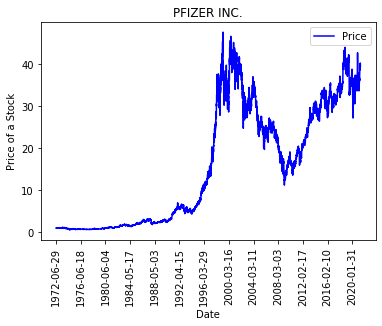

In [6]:
# Graph plot before Prediction

date =[]
for i in range(0,X.shape[0],1000):
    date.append(X[:,0][i])

plt.plot(X[:,0],y,color='blue',label='Price')
plt.title('PFIZER INC.')
plt.xticks(date,rotation=90)
plt.xlabel('Date')
plt.ylabel('Price of a Stock')
plt.legend()
plt.show()

In [7]:
# Data Splitting into Training and Testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
x_train = X_train[:,1:]
x_test = X_test[:,1:]

In [8]:
# Regression Model

regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [9]:
# Testing and Prediction based on Model

y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[36.77 37.28]
 [16.1  16.34]
 [16.53 15.02]
 ...
 [ 5.81  5.68]
 [ 0.55  0.57]
 [25.3  25.66]]


In [10]:
# Evaluation of Performnace of Model

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def mean_biased_error(y_true, y_pred):
    return (y_true-y_pred).mean()


print("R2 score: ",r2_score(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test,y_pred,squared=False))
print("MAPE: ",mean_absolute_percentage_error(y_test,y_pred))
print("MBE: ",mean_biased_error(y_test,y_pred))

R2 score:  0.9985699428408032
RMSE:  0.5365233694951793
MAPE:  1.8163308782787184
MBE:  -0.01532774964034936


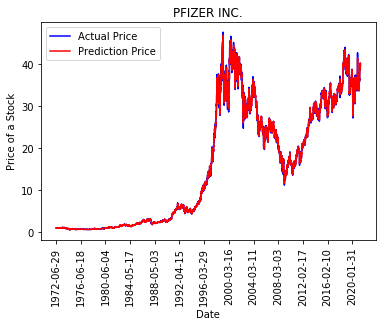

In [11]:
#Graph after Prediction

date =[]
for i in range(0,X.shape[0],1000):
    date.append(X[:,0][i])

plt.plot(X[:,0],y,color='blue',label='Actual Price')
plt.plot(X[:,0],regressor.predict(x),color='red',label='Prediction Price')
plt.title('PFIZER INC.')
plt.xticks(date,rotation=90)
plt.xlabel('Date')
plt.ylabel('Price of a Stock')
plt.legend()
plt.show()

In [14]:
# Running Model on real time data using API

import requests
import math

def features(api_response):
    arr = list(api_response['Time Series (Daily)'].values())
    new=[{'volume':float(arr[0]['5. volume']),'date':list(api_response['Time Series (Daily)'].keys())[0]},{'volume':float(arr[1]['5. volume'])},{'volume':float(arr[2]['5. volume'])},{'volume':float(arr[3]['5. volume'])}]

    for i in range(4):
        new[i]['o_c'] = round(float(arr[i]['1. open']) - float(arr[i]['4. close']),6)

    for i in range(4):
        new[i]['h_l'] = round(float(arr[i]['2. high']) - float(arr[i]['3. low']),6)

    for i in range(4):
        sum_7 = 0
        for j in range(i,i+7):
            sum_7 = sum_7 + float(arr[j]['4. close'])
        avg_7 = round(sum_7/7,6)
        new[i]['avg_7'] = avg_7

    for i in range(4):
        sum_21 = 0
        for j in range(i,i+21):
            sum_21 = sum_21 + float(arr[j]['4. close'])
        avg_21 = round(sum_21/21,6)
        new[i]['avg_21'] = avg_21

    for i in range(4):
        sum_sd = 0;
        for j in range(i,i+7):
            sum_sd = sum_sd + (float(arr[j]['4. close']) - new[i]['avg_7'])**2
        sd_7 = round(math.sqrt(sum_sd/7),6)
        new[i]['sd_7'] = sd_7

    for i in range(4):
        ip = [[new[i]['volume'],new[i]['o_c'],new[i]['h_l'],new[i]['avg_7'],new[i]['avg_21'],new[i]['sd_7']]]
        new[i]['prediction'] = round(regressor.predict(ip)[0],2)

    for i in range(1,4):  
        new[i]['actual'] = arr[i-1]['4. close']
        new[i]['date'] = list(api_response['Time Series (Daily)'].keys())[i-1]
    
    return new

params = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'PFE',
    'outputsize' :'full',
    'apikey' : 'your-api-key'
#   'query': 'New York'
}
try:
    api_result = requests.get('https://www.alphavantage.co/query', params)
    api_response = api_result.json()

    new = features(api_response)
    print("Next day Prediction after date",new[0]['date'],"is $.",new[0]['prediction'])
    print("Last 3 days prediction vs actual value")
    print("Date\t\tPrediction\tActual")
    for i in range(1,4):
        print(new[i-1]['date'],"\t",new[i]['prediction'],"\t\t",new[i]['actual'])
except:
    print("Please Check your Internet Connection")

Next day Prediction after date 2021-05-28 is $. 39.82
Last 3 days prediction vs actual value
Date		Prediction	Actual
2021-05-28 	 39.32 		 38.7300
2021-05-28 	 39.64 		 38.6500
2021-05-27 	 39.72 		 38.9200
